## Importing Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Preprocessing

### Splitting Data

In [65]:
df = pd.read_csv('cleaned.csv')
df.dropna(inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Review,Rating
0,night,4
1,seattl,2
2,going,3
3,stay,5
4,tell,5


In [66]:
X = df['Review']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [67]:
X_train.shape

(14343,)

In [68]:
X_test.shape

(6147,)

### Vectorizing

In [69]:
Vect = CountVectorizer()

Vect.fit(X_train)
X_train_vect = Vect.transform(X_train)
X_test_vect = Vect.transform(X_test)

In [70]:
X_train_vect.shape

(14343, 2989)

In [71]:
X_test_vect.shape

(6147, 2989)

In [72]:
Vect.get_feature_names_out()

array(['aaa', 'aaaa', 'aald', ..., 'zzzzzzzzz', 'än', 'üè'], dtype=object)

### Normalizing

In [73]:
Tfidf = TfidfTransformer()
X_train_norm = Tfidf.fit_transform(X_train_vect)
X_test_norm = Tfidf.fit_transform(X_test_vect)

In [74]:
X_train_norm.shape

(14343, 2989)

In [75]:
X_test_norm.shape

(6147, 2989)

## Models Construction

In [76]:
def plot_conf_matrix (conf_matrix):

    plt.figure(figsize=(15,10))
    sns.heatmap(conf_matrix, annot=True,  fmt="d")
    plt.title('Confusion Matrix')

    plt.show()

### Decision Tree

In [77]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train_norm, y_train)
y_pred = Decision_Tree.predict(X_test_norm)
conf_matrix = confusion_matrix(y_test, y_pred)

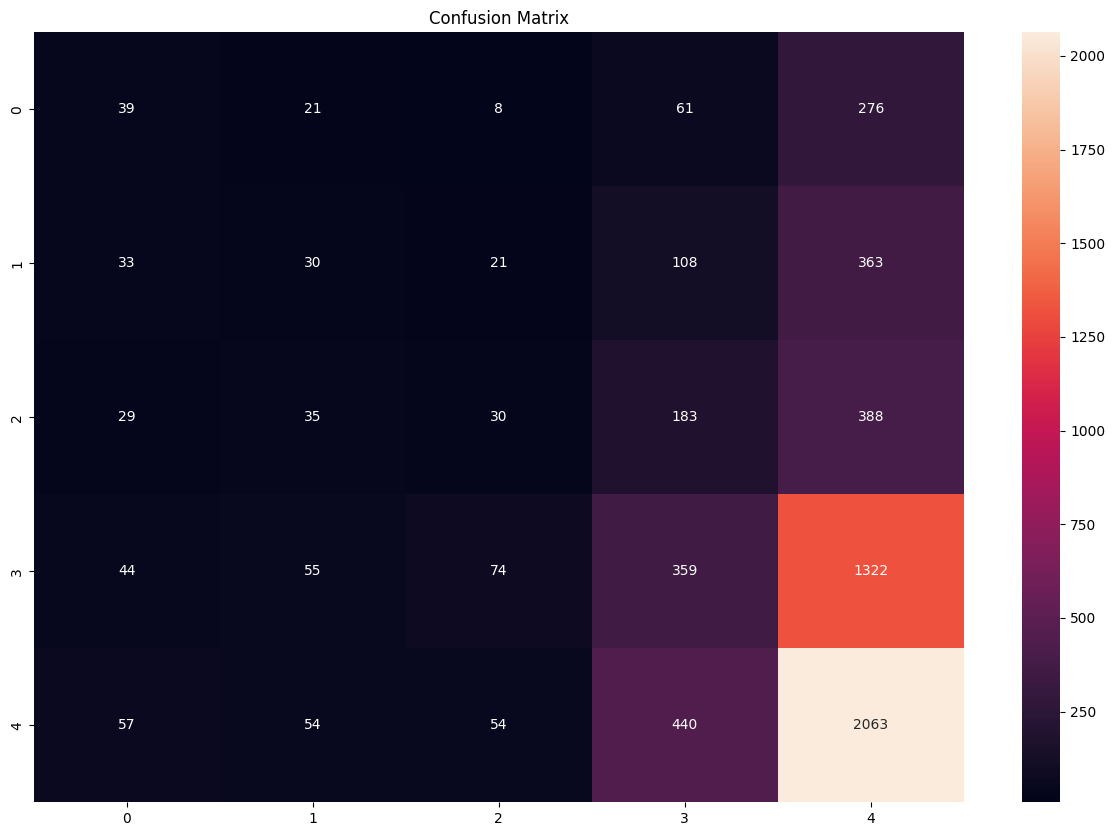

In [78]:
plot_conf_matrix(conf_matrix)

In [80]:
DecisionTree_score = Decision_Tree.score(X_train_norm, y_train)
DecisionTree_test = Decision_Tree.score(X_test_norm, y_test)

print('Training Score', DecisionTree_score)
print('Testing Score', DecisionTree_test)

Training Score 0.5733110227985777
Testing Score 0.410118757117293


### Random Forest

In [91]:
RandomForest = RandomForestClassifier(n_estimators = 100)
RandomForest.fit(X_train_norm, y_train)
y_pred = RandomForest.predict(X_test_norm)
conf_matrix = confusion_matrix(y_test, y_pred)

In [92]:
RandomForest_score = RandomForest.score(X_train_norm, y_train)
RandomForest_test = RandomForest.score(X_test_norm, y_test)

print('Training Score',RandomForest_score)
print('Testing Score',RandomForest_test)

Training Score 0.5733110227985777
Testing Score 0.42410932162030257


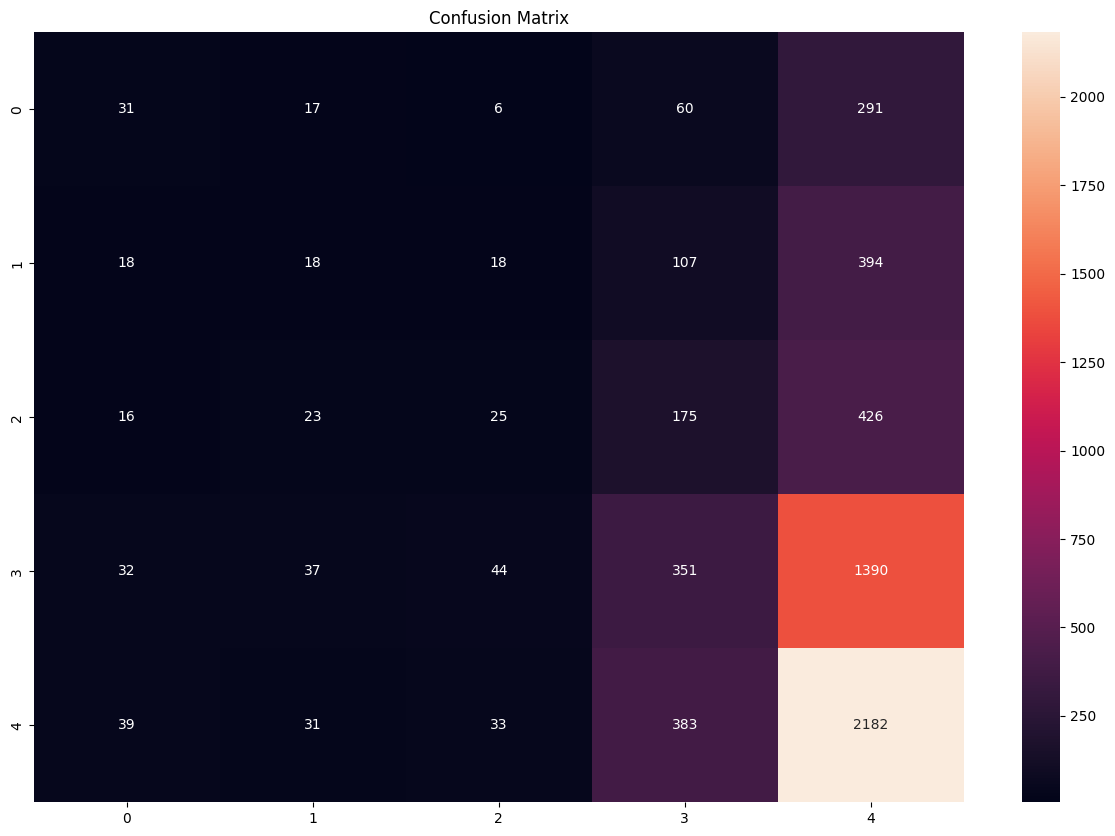

In [93]:
plot_conf_matrix(conf_matrix)